## Training Neural Networks to Recognize Facial Keypoint positions on face images

The objective of this task is to predict keypoint positions on face images. This can be used as a building block in several applications, such as:

tracking faces in images and video
analysing facial expressions
detecting dysmorphic facial signs for medical diagnosis
biometrics / face recognition
Detecing facial keypoints is a very challenging problem.  Facial features vary greatly from one individual to another, and even for a single individual, there is a large amount of variation due to 3D pose, size, position, viewing angle, and illumination conditions. Computer vision research has come a long way in addressing these difficulties, but there remain many opportunities for improvement.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analyse and Clean the data

In [2]:
df = pd.read_csv('/home/ishaan/Codes/Presentations/Projects/facial-keypoints-detection/training.csv')

In [3]:
df.head(5)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
# all he features in our data
print(df.keys())

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')


In [5]:
images = []
for i in range(len(df)):
    image = df["Image"].values[i].split(" ")
    images.append(image)

print(images[0])
    

['238', '236', '237', '238', '240', '240', '239', '241', '241', '243', '240', '239', '231', '212', '190', '173', '148', '122', '104', '92', '79', '73', '74', '73', '73', '74', '81', '74', '60', '64', '75', '86', '93', '102', '100', '105', '109', '114', '121', '127', '132', '134', '137', '137', '140', '139', '138', '137', '137', '140', '141', '143', '144', '147', '148', '149', '147', '147', '148', '145', '147', '144', '146', '147', '147', '143', '134', '130', '130', '128', '116', '104', '98', '90', '82', '78', '85', '88', '86', '80', '77', '87', '108', '111', '115', '128', '133', '188', '242', '252', '250', '248', '251', '250', '250', '250', '235', '238', '236', '238', '238', '237', '238', '242', '241', '239', '237', '233', '215', '195', '187', '156', '119', '103', '93', '78', '68', '73', '75', '75', '72', '75', '70', '61', '66', '77', '91', '96', '106', '108', '113', '120', '125', '131', '134', '138', '135', '138', '139', '145', '144', '144', '142', '140', '141', '141', '148', '147', '

In [6]:
# to reduce operation cost lets reduce image size
image_list = np.array(images,dtype = float)
print(image_list[0])


[ 238.  236.  237. ...,   70.   75.   90.]


In [9]:
train_data = image_list.reshape(-1,96,96)

In [10]:
train_data[0]

array([[ 238.,  236.,  237., ...,  250.,  250.,  250.],
       [ 235.,  238.,  236., ...,  249.,  250.,  251.],
       [ 237.,  236.,  237., ...,  251.,  251.,  250.],
       ..., 
       [ 186.,  183.,  181., ...,   52.,   57.,   60.],
       [ 189.,  188.,  207., ...,   61.,   69.,   78.],
       [ 191.,  184.,  184., ...,   70.,   75.,   90.]])

## Why we need to convert images to grayscale?

Each of the pixels that represents an image stored inside a computer has a pixel value which describes how bright that pixel is, and/or what color it should be. In the simplest case of binary images, the pixel value is a 1-bit number indicating either foreground or background. For a grayscale images, the pixel value is a single number that represents the brightness of the pixel. The most common  pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white. Values in between make up the different shades of gray.

To represent color images, separate red, green and blue components must be specified for each pixel (assuming an RGB colorspace), and so the pixel `value' is actually a vector of three numbers. Often the three different components are stored as three separate `grayscale' images known as color planes (one for each of red, green and blue), which have to be recombined when displaying or processing.

## Data Visualisation

In [28]:
#Function to  print an image
def plot_image(image):
    plt.imshow(image)
    plt.show()

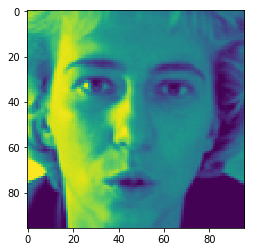

In [29]:
plot_image(train_data[1])

## CREATE TRAIN DATA

In [3]:
import csv

In [4]:
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

In [5]:
def load_dataset():
    
    Xtrain = []
    Ytrain = []
    with open('/home/ishaan/Codes/Presentations/Projects/facial-keypoints-detection/training.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((96,96,1), dtype=np.float)
            #print(img.shape)
            for i, val in enumerate(row["Image"].split(" ")):
                #print(i,val)
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
                
            Yitem = []
            failed = False
            for coord in row:
                if coord == "Image":
                    continue
                if(row[coord].strip()==""):
                    failed = True
                    break
                Yitem.append(float(row[coord]))
            if not failed:
                Xtrain.append(img)
                Ytrain.append(Yitem)
                
    return np.array(Xtrain), np.array(Ytrain, dtype=np.float)

In [6]:
x_train,y_train = load_dataset()

In [7]:
x_train = x_train[:]
y_train = y_train[:]

In [8]:
def show_image(X,Y):
    img = np.copy(X)
    for i in range(0,Y.shape[0],2):
        if 0 < Y[i+1] < IMAGE_HEIGHT and 0 < Y[i] < IMAGE_WIDTH:
            img[int(Y[i+1]),int(Y[i]),0] = 255
    plt.imshow(img[:,:,0])
    

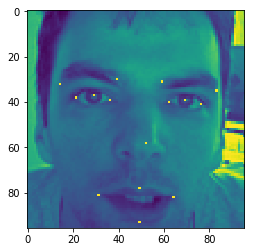

In [9]:
show_image(x_train[5],y_train[5])

## Learning Model

In [10]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.optimizers import Adam,SGD
from keras.losses import mean_squared_error
from keras.metrics import mae

Using TensorFlow backend.


In [11]:
model = Sequential([Flatten(input_shape = (IMAGE_HEIGHT,IMAGE_WIDTH,1)),
                   Dense(128,activation="relu"),
                   Dropout(0.1),
                   Dense(64,activation="relu"),
                   Dense(30)])

In [12]:
model = Sequential()
model.add(Flatten(input_shape = (IMAGE_HEIGHT,IMAGE_WIDTH,1)))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dense(30))

In [13]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [14]:
model.compile(optimizer=adam,loss=mean_squared_error)


## Train model

In [15]:
model.fit(x_train,y_train,epochs = 500)

Epoch 1/500
2140/2140 [==============================] - 4s 2ms/step - loss: 13090.2840
Epoch 2/500
2140/2140 [==============================] - 2s 759us/step - loss: 1071.1063
Epoch 3/500
2140/2140 [==============================] - 2s 813us/step - loss: 417.3218
Epoch 4/500
2140/2140 [==============================] - 2s 770us/step - loss: 395.0357
Epoch 5/500
2140/2140 [==============================] - 2s 789us/step - loss: 378.8702
Epoch 6/500
2140/2140 [==============================] - 2s 785us/step - loss: 374.2595
Epoch 7/500
2140/2140 [==============================] - 2s 781us/step - loss: 375.9144
Epoch 8/500
2140/2140 [==============================] - 2s 783us/step - loss: 370.5411
Epoch 9/500
2140/2140 [==============================] - 2s 778us/step - loss: 338.2758
Epoch 10/500
2140/2140 [==============================] - 2s 768us/step - loss: 308.2218
Epoch 11/500
2140/2140 [==============================] - 2s 778us/step - loss: 361.8644
Epoch 12/500
2140/2140 [=====

2140/2140 [==============================] - 2s 884us/step - loss: 65.0133
Epoch 94/500
2140/2140 [==============================] - 2s 883us/step - loss: 58.5380
Epoch 95/500
2140/2140 [==============================] - 2s 829us/step - loss: 59.7271
Epoch 96/500
2140/2140 [==============================] - 2s 961us/step - loss: 50.7215
Epoch 97/500
2140/2140 [==============================] - 2s 850us/step - loss: 47.9270
Epoch 98/500
2140/2140 [==============================] - 2s 862us/step - loss: 44.1465
Epoch 99/500
2140/2140 [==============================] - 2s 846us/step - loss: 43.2910
Epoch 100/500
2140/2140 [==============================] - 2s 854us/step - loss: 39.2490
Epoch 101/500
2140/2140 [==============================] - 2s 858us/step - loss: 37.1702
Epoch 102/500
2140/2140 [==============================] - 2s 873us/step - loss: 32.2752
Epoch 103/500
2140/2140 [==============================] - 2s 872us/step - loss: 27.5298
Epoch 104/500
2140/2140 [================

2140/2140 [==============================] - 3s 1ms/step - loss: 8.6989
Epoch 186/500
2140/2140 [==============================] - 2s 1ms/step - loss: 12.1401
Epoch 187/500
2140/2140 [==============================] - 2s 999us/step - loss: 10.1621
Epoch 188/500
2140/2140 [==============================] - 2s 895us/step - loss: 10.1579
Epoch 189/500
2140/2140 [==============================] - 2s 814us/step - loss: 10.1563
Epoch 190/500
2140/2140 [==============================] - 2s 825us/step - loss: 10.1537
Epoch 191/500
2140/2140 [==============================] - 2s 791us/step - loss: 10.1606
Epoch 192/500
2140/2140 [==============================] - 2s 745us/step - loss: 10.1607
Epoch 193/500
2140/2140 [==============================] - 2s 764us/step - loss: 10.1627
Epoch 194/500
2140/2140 [==============================] - 2s 799us/step - loss: 10.1581
Epoch 195/500
2140/2140 [==============================] - 2s 816us/step - loss: 10.1604
Epoch 196/500
2140/2140 [===============

2140/2140 [==============================] - 2s 746us/step - loss: 10.1786
Epoch 278/500
2140/2140 [==============================] - 2s 750us/step - loss: 10.1702
Epoch 279/500
2140/2140 [==============================] - 2s 744us/step - loss: 10.1678
Epoch 280/500
2140/2140 [==============================] - 2s 747us/step - loss: 10.1677
Epoch 281/500
2140/2140 [==============================] - 2s 750us/step - loss: 10.1708
Epoch 282/500
2140/2140 [==============================] - 2s 745us/step - loss: 10.1742
Epoch 283/500
2140/2140 [==============================] - 2s 743us/step - loss: 10.1765
Epoch 284/500
2140/2140 [==============================] - 2s 744us/step - loss: 10.1712
Epoch 285/500
2140/2140 [==============================] - 2s 746us/step - loss: 10.1748
Epoch 286/500
2140/2140 [==============================] - 2s 744us/step - loss: 10.1795
Epoch 287/500
2140/2140 [==============================] - 2s 742us/step - loss: 10.1771
Epoch 288/500
2140/2140 [==========

2140/2140 [==============================] - 2s 754us/step - loss: 10.1785
Epoch 370/500
2140/2140 [==============================] - 2s 757us/step - loss: 10.1739
Epoch 371/500
2140/2140 [==============================] - 2s 758us/step - loss: 10.1738
Epoch 372/500
2140/2140 [==============================] - 2s 755us/step - loss: 10.1733
Epoch 373/500
2140/2140 [==============================] - 2s 756us/step - loss: 10.1803
Epoch 374/500
2140/2140 [==============================] - 2s 751us/step - loss: 10.1679
Epoch 375/500
2140/2140 [==============================] - 2s 764us/step - loss: 10.1685
Epoch 376/500
2140/2140 [==============================] - 2s 753us/step - loss: 10.1809
Epoch 377/500
2140/2140 [==============================] - 2s 756us/step - loss: 10.1767
Epoch 378/500
2140/2140 [==============================] - 2s 763us/step - loss: 10.1976
Epoch 379/500
2140/2140 [==============================] - 2s 757us/step - loss: 10.1941
Epoch 380/500
2140/2140 [==========

2140/2140 [==============================] - 2s 763us/step - loss: 10.1822
Epoch 462/500
2140/2140 [==============================] - 2s 753us/step - loss: 10.1784
Epoch 463/500
2140/2140 [==============================] - 2s 764us/step - loss: 10.1736
Epoch 464/500
2140/2140 [==============================] - 2s 761us/step - loss: 10.1698
Epoch 465/500
2140/2140 [==============================] - 2s 771us/step - loss: 10.1729
Epoch 466/500
2140/2140 [==============================] - 2s 761us/step - loss: 10.1714
Epoch 467/500
2140/2140 [==============================] - 2s 763us/step - loss: 10.1734
Epoch 468/500
2140/2140 [==============================] - 2s 781us/step - loss: 10.1745
Epoch 469/500
2140/2140 [==============================] - 2s 760us/step - loss: 10.1813
Epoch 470/500
2140/2140 [==============================] - 2s 769us/step - loss: 10.1823
Epoch 471/500
2140/2140 [==============================] - 2s 754us/step - loss: 10.1784
Epoch 472/500
2140/2140 [==========

## Create TEST DATA

In [16]:
def load_testset():
    Xtest = []
    with open('/home/ishaan/Codes/Presentations/Projects/facial-keypoints-detection/training.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Xtest.append(img)
                
    return np.array(Xtest)


In [17]:
x_test  = load_testset()

## Results 

In [18]:
def output(image_index):
    Ypred = model.predict(x_test[image_index:(image_index+1)])
    show_image(x_test[image_index], Ypred[0])

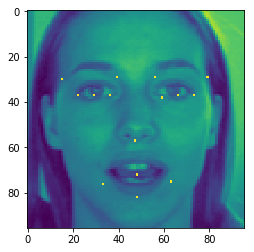

In [19]:
output(30)

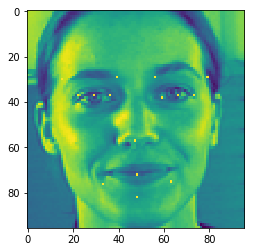

In [20]:
output(9)